In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Data: y = 2x + 1
# -----------------------
x = np.linspace(-1, 1, 200).reshape(-1, 1)   # (N,1)
y = 2 * x + 1                                # (N,1)


In [3]:
def relu(z): return np.maximum(0, z)
def relu_prime(z): return (z > 0).astype(float)

def sigmoid(z): return 1 / (1 + np.exp(-z))
def sigmoid_prime(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z): return np.tanh(z)
def tanh_prime(z): return 1 - np.tanh(z)**2

def mse(y_true, y_pred): return np.mean((y_true - y_pred)**2)

In [4]:
def train_activation(hidden_activation, hidden_units=16, lr=0.05, epochs=150, seed=0):
    np.random.seed(seed)   # reproducible
    # init params (small random weights, zero biases)
    W1 = np.random.randn(1, hidden_units) * 0.1
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units, 1) * 0.1
    b2 = np.zeros((1, 1))
    N = x.shape[0]

    losses = []

    for ep in range(epochs):
        # ---- forward ----
        z1 = x @ W1 + b1   # (N, hidden_units)

        if hidden_activation == 'relu':
            a1 = relu(z1)
        elif hidden_activation == 'sigmoid':
            a1 = sigmoid(z1)
        elif hidden_activation == 'tanh':
            a1 = tanh(z1)
        else:
            raise ValueError("Unknown activation")

        y_pred = a1 @ W2 + b2  # linear output (N,1)

        # loss
        loss = mse(y, y_pred)
        losses.append(loss)

        # ---- backward (batch) ----
        dL_dy = (2.0 / N) * (y_pred - y)   # (N,1)

        # gradients for W2, b2
        dW2 = a1.T @ dL_dy                # (hidden_units,1)
        db2 = np.sum(dL_dy, axis=0, keepdims=True)

        # backprop into hidden layer
        delta = dL_dy @ W2.T              # (N, hidden_units)

        # multiply by derivative of activation
        if hidden_activation == 'relu':
            delta *= relu_prime(z1)
        elif hidden_activation == 'sigmoid':
            delta *= sigmoid_prime(z1)
        elif hidden_activation == 'tanh':
            delta *= tanh_prime(z1)

        dW1 = x.T @ delta                 # (1, hidden_units)
        db1 = np.sum(delta, axis=0, keepdims=True)

        # ---- update ----
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    return losses, (W1, b1, W2, b2)


In [5]:
activations = ['relu', 'sigmoid', 'tanh']
results = {}
final_models = {}

for act in activations:
    results[act], final_models[act] = train_activation(act, hidden_units=16, lr=0.05, epochs=150, seed=1)


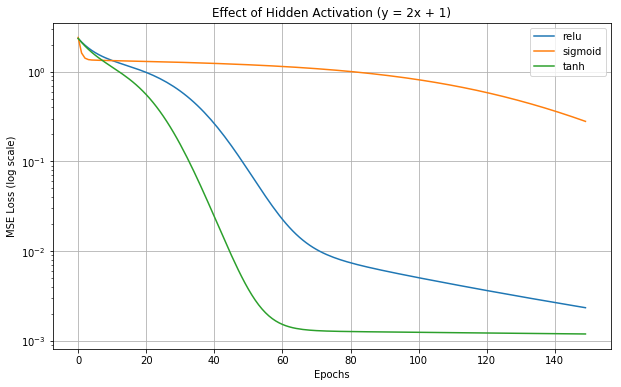

In [6]:
plt.figure(figsize=(10,6))
for act in activations:
    plt.plot(results[act], label=act)
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('Effect of Hidden Activation (y = 2x + 1)')
plt.legend()
plt.grid(True)
plt.show()
